## El 2805 Lab 1
By: David Rommedahl, Ning Wang

## Problem 1a:

To model the problem as an MDP we can consider the maze.py code that was used for Lab 0, modifying it to accomodate for the case of the added minotaur.
After modifying the actual maze so that it fits the new description we have to define the state space, action space, transition probabilities and the rewards.


#### State Space
We consider the state space:

\begin{equation}
    \mathcal{S} = \left\{(i,j,m,n): \textrm{such that maze}[i,j]\neq 1 \textrm{ and the cell }(m,n) \textrm{ is any cell within the maze}\right\}.
\end{equation}

This way the indexes $(i,j)$ represent the player's position within the maze and $(m,n)$ represent the minotaur's position, and any combination of these positions within the maze that do not put the player inside of a wall are valid states. The size of the state space is greatly increased from the model of Lab 0, but the model is conceptually simple.

#### Action Space
The action space is the same as for Lab 0:

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition Probabilities
The transition probabilities is the part of this lab where the greatest modification had to be made to the model from Lab 0. The movements of the player are deterministic (if the player chooses to move left the player will move left with probability 1 as long as moving left is a legal move. If it is not a legal move the player will remain in the same position), but the minotaur performs a random walk with the only limitation being that it is not allowed to stay in the same place (it is not allowed to perform a $\textit{Snake}$-esque move of moving out of the maze on one side and reappearing on the other side of the maze either). As each state is defined as the position of the player $\textit{and}$ the position of the minotaur, the state transition probabilities will be random with a probability given by the possible next positions for the minotaur.

For example, if the player makes a legal move to the right and the minotaur is in a position where it is allowed to move in all four directions there are four possible next states for the action $\textit{move right}$, each with a transition probability of $\frac{1}{4}$.

   - If at state $s$ action $a$ does not lead to a wall the transition probability is $\mathbb{P}(s'\mid s, a)=\frac{1}{s_p}$, where $s_p$ is the number of possible next positions for the minotaur.
   - If at state $s$ action $a$ $\textit{does}$ lead to a wall the transition probability is $\mathbb{P}(s\mid s, a)=1$. This means that both the player and minotaur will stay in the same position. The fact that the minotaur does not move in this case does not matter for the implementation.
   - If the player has reached the end state or is eaten by the minotaur ($(i,j)=(m,n)$) the transition probability is $\mathbb{P}(s \mid s, a) = 1$.

#### Rewards

The objective is to find the exit of the maze while avoiding obstacles and not being eaten by the minotaur:

   - If the player walks into an obstacle or is eaten by the minotaur the player receives a reward of $r(s,a)=-100$
   - If the player reaches the end state they receive a reward of $r(s,a)=0$
   - If the player makes a legal move they receive a reward of $r(s,a)=-1$

Since the transition probabilities are random in this implementation the rewards are received after an action is taken, which is consistent with the course litterature.

## Problem 1b:

In problem 1b we are expected to compute a policy which maximizes the probability of exiting the maze using dynamic programming and to illustrate this policy. We have decided to do this by using the methods for simulating and plotting a scenario already implemented for Lab 0, with modifications made to suite our code. 

In [1]:
import maze as mz
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

# Modified maze from lab0. Now corresponding to maze in lab1

maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env_1 = mz.Maze(maze)

In [2]:
#### Dynamic Programming

# Finite horizon
horizon = 20
method = "DynProg"

# Solve the MDP problem with dynamic programming
V, policy_1 = mz.dynamic_programming(env_1, horizon)

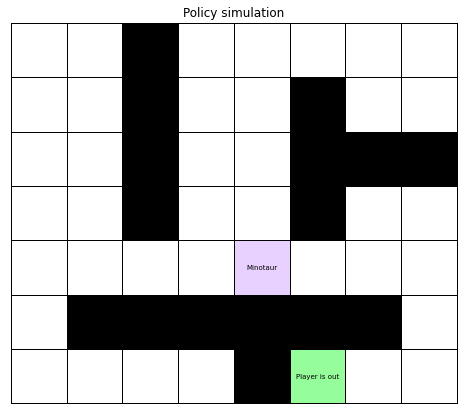

In [4]:


# Simulate the shortest path starting from position A
start = (0, 0, 6, 5)
path_1 = env_1.simulate(start, policy_1, method)

# Show the shortest path
mz.animate_solution(maze, path_1)

## Problem 1c:

The next problem is to vary the time horizon, $T = 1,\dots,30$. For each $T$, a policy which maximizes the probability of exiting the maze should be found, and the probability should be plotted. Finally, the case when the minotaur is allowed to stand still should also be considered.

#### Minotaur cannot stand still

In [5]:
exit_probability_must_move = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env_1, horizon)
    exit_probability_must_move[horizon-1] = mz.policy_evaluation(env_1, policy, horizon)

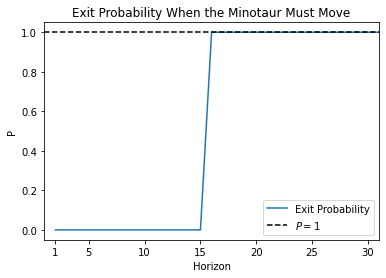

In [6]:
plt.plot(np.arange(1,31),exit_probability_must_move, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Must Move")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([0, 30])
plt.xticks([1, 4, 9, 14, 19, 24, 29], labels=[1,5,10,15,20,25,30])
plt.show()

#### Analysis
Clearly the player has found an optimal policy which garantees them to leave the maze in 15 timesteps.

#### The Minotaur is Allowed to Stand Still

In [7]:
env_2 = mz.Maze(maze, stand_still=True)
exit_probability_stand_still = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env_2, horizon)
    exit_probability_stand_still[horizon-1] = mz.policy_evaluation(env_2, policy, horizon)

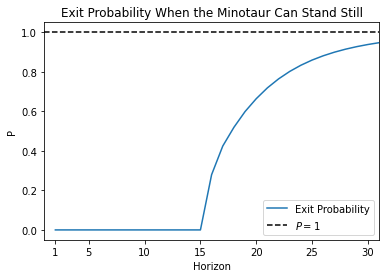

In [8]:
plt.plot(np.arange(1,31),exit_probability_stand_still, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Can Stand Still")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([0, 30])
plt.xticks([1, 4, 9, 14, 19, 24, 29], labels=[1,5,10,15,20,25,30])
plt.show()

#### Analysis
If the minotaur is allowed to stand still there are more considerations for the player to make when choosing their route, and they are less likely to exit the maze. We see that the probability grows towards 1 when the time horizon becomes longer, but there is always a risk that the player gets stuck. Below is a simulation of one of these scenarios, when the horizon is 30 and the minotaur is allowed to stand still.

In [9]:
path_2 = env_2.simulate(start, policy, method)

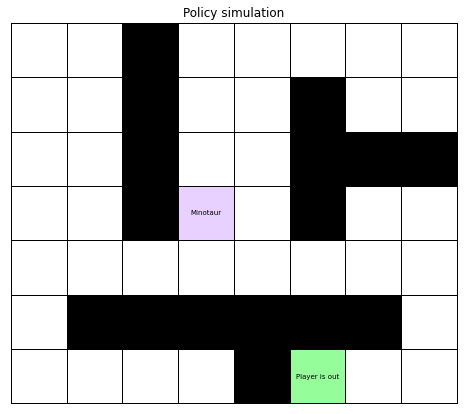

In [10]:
mz.animate_solution(maze, path_2)

## Problem 1d
#### Player is poisoned

If the player is poisoned and their life is geometrically distributed with mean 30, the probability of the player dying after k timesteps is $(1-p)^{k-1}p$, where $\frac{1}{p}=30$. This gives us that the probability of dying at each individual timestep is given by $p = \frac{1}{30}$.

The main modification to the problem that is needed is to include a new, absorbing, "Dead" state. The transition probability to this new state for any $(s,a)$ pair is $p$ and the reward for ending up in this state is the same as for walking into a wall or being caught by the minotaur, $-100$. 

The $\gamma$- parameter must be set high enough that the agent is motivated to find the exit. We have chosen to set it to 1/3. If $\gamma$ is set too low the player will not know what to do, and will simply stay in place. 

Below is a simulation for the case when the agent is poisoned, and the minotaur is allowed to stand still.



In [11]:
env_3 = mz.Maze(maze, stand_still=True, life_mean=30)
V,policy_3 = mz.value_iteration(env_3, 1/3, epsilon=0.0001)

In [12]:
method = 'ValIter'
start = (0,0,6,5)
path_3 = env_3.simulate(start, policy_3, method)

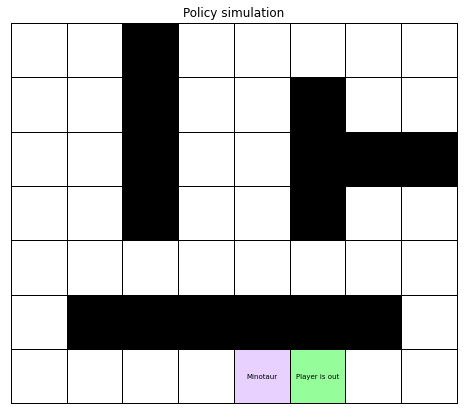

In [13]:
mz.animate_solution(maze, path_3)

## Problem 1e

To calculate the probability of exiting the maze while poisoned, it is easier to consider the case when the minotaur is not allowed to stand still, as we have previously seen that the agent is guaranteed to exit the maze in 15 timesteps for this case (unless they die of poisoning). The probability of this is simply the probability of not dying within 15 timesteps, and this can be calculated using the CDF of the geometric distribution:

$$CDF_{geometric}(k) = 1 - (1-p)^k\;.$$

The CDF gives us the probability of dying within the first k timesteps, so to calculate the probability of getting out alive we use

$$1 - CDF_{geometric}(15) = (1-p)^{15} \approx 0.6014\;.$$

If we estimate this probability by simulating $N = 10000$ attempts we get:

In [14]:
env_4 = mz.Maze(maze, stand_still=False, life_mean=30)
V,policy_4 = mz.value_iteration(env_4, 1/3, epsilon=0.0001)

nr_escape = 0
start = (0,0,6,5)
method = 'ValIter'
N = 10000
for i in range(N):
    path_4 = env_4.simulate(start, policy_4, method)
    if path_4[-1] != "Dead":
        if maze[path_4[-1][0:2]] == 2 and path_4[-1][0:2] != path_4[-1][2:]:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)


Estimated probability of successful escape:
0.6015


We see that this value is close to the theoretically calculated one. 

If the minotaur is allowed to stand still this calculation becomes more involved, and we will not perform the theoretical calculations. However, we do know that the probability of getting out alive is lower if the minotaur is allowed to stand still. This should be reflected in the estimated probability if we simulate this scenario $N=10000$ times:

In [15]:
env_5 = mz.Maze(maze, stand_still=True, life_mean=30)
V,policy_5 = mz.value_iteration(env_5, 1/3, epsilon=0.0001)

nr_escape = 0
start = (0,0,6,5)
method = 'ValIter'
N = 10000
for i in range(N):
    path_5 = env_5.simulate(start, policy_5, method)
    if path_5[-1] != "Dead":
        if maze[path_5[-1][0:2]] == 2 and path_5[-1][0:2] != path_5[-1][2:]:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)

Estimated probability of successful escape:
0.5289


## Problem 1f
#### Theoretical questions

1) What does it mean that a learning method is on or off-policy?

  - An off-policy method learns a $Q(s,a)$ function using a behavior policy $\pi_b$, and then uses a greedy policy with respect to the learned $Q(s,a)$. The resulting policy is as a rule different from the behavior policy used. An off-policy works under the condition that the behavior policy explores all state-action pairs.
  - An on-policy algorithm learns a the value of a policy which is the same policy used to generate data. At each timestep and state, the algorithm acts according to the best policy it has access to at that time. 

2) State convergence requirements for Q-learning and SARSA:

  - For Q-learning the requirements are that the behavior policy $\pi_b$ visits every state-action pair $(s,a)$ infinitely often and that the learning rate $\alpha$ fulfills the following conditions:
    $$\sum_t\alpha = \infty$$$$\sum_t\alpha^2 < \infty$$
  - Requirements on the learning rate are the same for the SARSA algorithm as for the Q-learning algorithm. If the policy $\pi_t$ is $\epsilon$-greedy wrt $Q^{(t)}$, we have the convergence
  $$\lim_{n\to\infty}Q^{(t)} = Q^{\bar{\pi}}$$
    where $Q^{\bar{\pi}}$ is the best policy among all of the possible $\epsilon$-greedy policies. 

## Problem 1g

The modifications that are needed to the problem are as follows:
  - The player's life is geometrically distributed with mean 50 instead of mean 30
  - The minotaur's policy for moving has changed. It now moves randomly or deterministically "towards" the player with probability 65% and 35% respectively
  - There are keys located in position C, meaning that the player needs to reach this position before they are able to exit the maze

#### New mean of life distribution

The first modification is trivial, and will not require alterations to the code other than the life_mean parameter given to the environment and the gamma parameter of the value iteration algorithm.

#### New minotaur policy

The minotaur's new policy will require alterations to the transition probabilities, however. Consider the following scenario:

The player has chosen action $a$, and the minotaur is in a location where it is not restricted in which action it is able to make. It has the choice of moving in either direction, but not staying put. Out of these four actions, two of them will result in a smaller distance (manhattan distance is chosen as the metric) between the minotaur and the player than the other two. We call these two actions $a_1$ and $a_2$. Given that the minotaur decides to move towards the player, the probability of $a_1$ or $a_2$ is $0.5$ each. We write:

$$\mathbb{P}(a_1\mid towards)=\mathbb{P}(a_2\mid towards)=0.5$$
$$\mathbb{P}(a_i\mid towards)=0, \; \forall \; i \in \left\{3,4\right\}$$

If the minotaur moves at random we have a uniform probability of choosing any action:

$$\mathbb{P}(a_i \mid random) = \tfrac{1}{4}, \; \forall \; i \in \left\{1,2,3,4\right\}$$

Now, to get the total probability of the minotaur choosing any action $a_i$, we marginalize:

$$\mathbb{P}(a_i) = \mathbb{P}(a_i \mid towards)\mathbb{P}(towards) + \mathbb{P}(a_i \mid random)\mathbb{P}(random)\;.$$

For actions $a_1$ and $a_2$ this becomes:

$$\mathbb{P}(a_1) = 0.5 \cdot 0.65 + 0.2 \cdot 0.35 = 0.395 = \mathbb{P}(a_2) \;.$$

In this way, with consideration to the possible actions of the minotaur, the new state transition probabilities can be found for an arbitrary distribution between the cases of moving randomly or towards the player. The above implementation will work with minor adjustments also for the case when the minotaur is allowed to stand still.

#### Introduction of keys

The introduction of keys in position C could be solved by adding an extra dimension to the state space, indicating whether the keys have been found or not. The rewards will remain mostly the same, taking a legal step will be associated with a reward of -1 and walking into a wall, being eaten or dying of poison will be rewarded with -100. If the keys have not yet been found (the player has not yet been in position C), the reward for reaching the end position B will also be associated with a reward of -1, however. As soon as the player reaches position C and finds the keys the exit position B will again be associated with a zero reward. In this way, the player should learn to first visit C and then proceed to B.

In [16]:
import maze_keys as mz_k
env_6 = mz_k.Maze(maze, life_mean=50, prob_random=0.65)

In [17]:
V,policy_6 = mz_k.value_iteration(env_6, 0.9, epsilon=0.01)

In [ ]:
method = 'ValIter'
start_6 = (0,0,6,5,0)
path_6 = env_6.simulate(start_6, policy_6, method)

#### Simulation of the scenario with keys

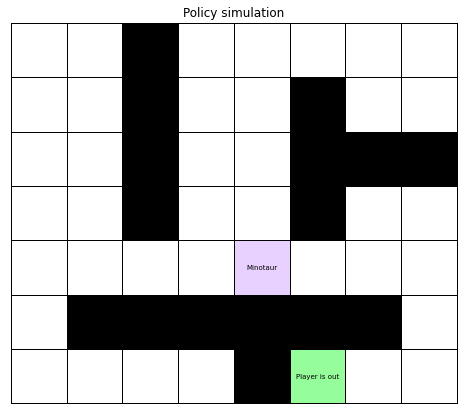

In [23]:
mz_k.animate_solution(maze, path_6)

#### Verification of environment

Using the theoretical calculations presented previously for the case when the minotaur is not allowed to stand still, an exact probability of exiting the maze can be obtained. The minimum amount of steps taken to exit the maze is $29$ with the addition of the keys, and using the $CDF$ with $p = \tfrac{1}{50}$ we can calculate the probability of escaping as:

$$\mathbb{P}(escape) = (1-p)^{29} \approx 0.5567 \;.$$

Below is an estimation of this value using $N=10000$ simulations:

In [20]:
nr_escape = 0
method = 'ValIter'
N = 10000
for i in range(N):
    path_7 = env_6.simulate(start_6, policy_6, method)
    if path_7[-1] != "Dead":
        if maze[path_7[-1][0:2]] == 2 and path_7[-1][0:2] != path_7[-1][2:] and path_7[-1][-1]==1:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)


Estimated probability of successful escape:
0.5592


#### Analysis
We see, again, that the estimated value is close to the theoretically calculated one, and conclude that the environment seems to function as it should